In [ ]:
from __future__ import print_function
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.python.tools import freeze_graph, optimize_for_inference_lib
from tensorflow.python.keras.backend import set_session
from keras.models import Sequential, load_model
MODEL_NAME="Menstruation_cycle_prediction"

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:

dataset = pd.read_csv('C:/Users/Dell/Desktop/tempppp/data.csv')
dataset.dropna(axis=0)
dataset = dataset.replace(r'^\s+$', np.nan, regex=True)
dataset

data=dataset.drop(axis=1,labels=['MeanBleedingIntensity','MeanMensesLength','Group','CycleNumber','CycleWithPeakorNot','ReproductiveCategory','FirstDayofHigh','TotalNumberofHighDays','TotalHighPostPeak','TotalNumberofPeakDays','TotalDaysofFertility','TotalFertilityFormula','NumberofDaysofIntercourse','IntercourseInFertileWindow','UnusualBleeding','PhasesBleeding','IntercourseDuringUnusBleed','AgeM','Maristatus','MaristatusM','Yearsmarried','Wedding','Religion','ReligionM','Ethnicity','EthnicityM','Schoolyears','SchoolyearsM','OccupationM','IncomeM','Reprocate','Numberpreg','Livingkids','Miscarriages','Abortions','Medvits','Medvitexplain','Gynosurgeries','LivingkidsM','Boys','Girls','MedvitsM','MedvitexplainM','Urosurgeries','Breastfeeding','Method','Prevmethod','Methoddate','Whychart','Nextpreg','NextpregM','Spousesame','SpousesameM','Timeattemptpreg','MensesScoreDay12','MensesScoreDay13','MensesScoreDay14','MensesScoreDay15','MensesScoreDayNine','MensesScoreDayTen','MensesScoreDay11'])
data.isnull().sum()

data['MeanCycleLength'].fillna(method='ffill',inplace=True)
data['Age'].fillna(method='ffill',inplace=True)
data['Height'].fillna(method='ffill',inplace=True)
data['Weight'].fillna(method='ffill',inplace=True)
data['BMI'].fillna(method='ffill',inplace=True)

data['LengthofMenses'].fillna(method='ffill',inplace=True)
data['TotalMensesScore'].fillna(method='ffill',inplace=True)

data['MensesScoreDayOne'].fillna(value=0,inplace=True)
data['MensesScoreDayTwo'].fillna(value=0,inplace=True)
data['MensesScoreDayThree'].fillna(value=0,inplace=True)
data['MensesScoreDayFour'].fillna(value=0,inplace=True)
data['MensesScoreDayFive'].fillna(value=0,inplace=True)
data['MensesScoreDaySix'].fillna(value=0,inplace=True)
data['MensesScoreDayEight'].fillna(value=0,inplace=True)
data['MensesScoreDaySeven'].fillna(value=0,inplace=True)

data['LengthofLutealPhase'].fillna(value=13,inplace=True)
data['EstimatedDayofOvulation'].fillna(value=14,inplace=True)

data.isnull().sum()

data.reindex(np.random.permutation(data.index))



#Test and Train data

model_data=data.drop(axis=1,labels=['ClientID','LengthofCycle'])
y=data['LengthofCycle']
X_train, X_test, y_train, y_test = train_test_split(model_data, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train.head())
print(y_train.head())

#Standardizing data

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)



In [20]:
print(X_train[1])
print(y_train[1])

[ 3.78446587  2.38701692 -1.70859444 -0.18788872 -0.35249044 -0.88062664
 -0.01543717 -0.61357199  0.10960157 -0.69975901 -0.36879463 -0.19542707
 -0.67030988 -1.4456512  -2.42017852 -0.417143    0.32594908]
27


In [44]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint

In [52]:
n_hidden_1 = 9 
n_hidden_2 = 5 
n_hidden_3 = 3 
n_input = 17 
output_layer = 1 


# Create model
def multilayer_perceptron():
    model = Sequential()
    model.add(Dense(n_hidden_1, activation=tf.nn.relu, input_dim=n_input,name="layer1")),
    model.add(Dense(n_hidden_2, activation=tf.nn.relu,name="layer2")),
    model.add(Dense(n_hidden_3, activation=tf.nn.relu,name="layer3")),
    model.add(Dense(output_layer,name="layer4"))
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',
                optimizer=keras.optimizers.Adam,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model



In [53]:
from keras.layers import Dense
from keras.optimizers import SGD
model = multilayer_perceptron()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 9)                 162       
_________________________________________________________________
layer2 (Dense)               (None, 5)                 50        
_________________________________________________________________
layer3 (Dense)               (None, 3)                 18        
_________________________________________________________________
layer4 (Dense)               (None, 1)                 4         
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [54]:
best_model_file = "prediction.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)

print('Training model...')
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot(),best_model])
print('Traing finished.')



Training model...

.
Epoch 00001: val_loss improved from inf to 863.31991, saving model to prediction.h5
.
Epoch 00002: val_loss improved from 863.31991 to 859.82654, saving model to prediction.h5
.
Epoch 00003: val_loss improved from 859.82654 to 855.79972, saving model to prediction.h5
.
Epoch 00004: val_loss improved from 855.79972 to 851.19765, saving model to prediction.h5
.
Epoch 00005: val_loss improved from 851.19765 to 845.65790, saving model to prediction.h5
.
Epoch 00006: val_loss improved from 845.65790 to 838.82081, saving model to prediction.h5
.
Epoch 00007: val_loss improved from 838.82081 to 830.08730, saving model to prediction.h5
.
Epoch 00008: val_loss improved from 830.08730 to 819.06080, saving model to prediction.h5
.
Epoch 00009: val_loss improved from 819.06080 to 805.77537, saving model to prediction.h5
.
Epoch 00010: val_loss improved from 805.77537 to 789.19130, saving model to prediction.h5
.
Epoch 00011: val_loss improved from 789.19130 to 770.01578, savin

.
Epoch 00092: val_loss improved from 11.52393 to 11.28508, saving model to prediction.h5
.
Epoch 00093: val_loss improved from 11.28508 to 11.07561, saving model to prediction.h5
.
Epoch 00094: val_loss improved from 11.07561 to 10.87578, saving model to prediction.h5
.
Epoch 00095: val_loss improved from 10.87578 to 10.71289, saving model to prediction.h5
.
Epoch 00096: val_loss improved from 10.71289 to 10.50415, saving model to prediction.h5
.
Epoch 00097: val_loss improved from 10.50415 to 10.29754, saving model to prediction.h5
.
Epoch 00098: val_loss improved from 10.29754 to 10.10958, saving model to prediction.h5
.
Epoch 00099: val_loss improved from 10.10958 to 9.90146, saving model to prediction.h5
.
Epoch 00100: val_loss improved from 9.90146 to 9.78348, saving model to prediction.h5

.
Epoch 00101: val_loss improved from 9.78348 to 9.61616, saving model to prediction.h5
.
Epoch 00102: val_loss improved from 9.61616 to 9.40968, saving model to prediction.h5
.
Epoch 00103: v

.
Epoch 00188: val_loss did not improve from 4.13403
.
Epoch 00189: val_loss improved from 4.13403 to 4.11237, saving model to prediction.h5
.
Epoch 00190: val_loss improved from 4.11237 to 4.11099, saving model to prediction.h5
.
Epoch 00191: val_loss improved from 4.11099 to 4.09892, saving model to prediction.h5
.
Epoch 00192: val_loss improved from 4.09892 to 4.09195, saving model to prediction.h5
.
Epoch 00193: val_loss improved from 4.09195 to 4.06014, saving model to prediction.h5
.
Epoch 00194: val_loss improved from 4.06014 to 4.04715, saving model to prediction.h5
.
Epoch 00195: val_loss improved from 4.04715 to 4.02626, saving model to prediction.h5
.
Epoch 00196: val_loss improved from 4.02626 to 4.00401, saving model to prediction.h5
.
Epoch 00197: val_loss improved from 4.00401 to 3.98917, saving model to prediction.h5
.
Epoch 00198: val_loss improved from 3.98917 to 3.98470, saving model to prediction.h5
.
Epoch 00199: val_loss improved from 3.98470 to 3.95671, saving mo

.
Epoch 00297: val_loss did not improve from 3.24728
.
Epoch 00298: val_loss did not improve from 3.24728
.
Epoch 00299: val_loss did not improve from 3.24728
.
Epoch 00300: val_loss improved from 3.24728 to 3.23163, saving model to prediction.h5

.
Epoch 00301: val_loss did not improve from 3.23163
.
Epoch 00302: val_loss did not improve from 3.23163
.
Epoch 00303: val_loss did not improve from 3.23163
.
Epoch 00304: val_loss improved from 3.23163 to 3.21898, saving model to prediction.h5
.
Epoch 00305: val_loss did not improve from 3.21898
.
Epoch 00306: val_loss improved from 3.21898 to 3.20924, saving model to prediction.h5
.
Epoch 00307: val_loss did not improve from 3.20924
.
Epoch 00308: val_loss improved from 3.20924 to 3.19485, saving model to prediction.h5
.
Epoch 00309: val_loss did not improve from 3.19485
.
Epoch 00310: val_loss did not improve from 3.19485
.
Epoch 00311: val_loss improved from 3.19485 to 3.19075, saving model to prediction.h5
.
Epoch 00312: val_loss impro

.
Epoch 00423: val_loss did not improve from 2.85434
.
Epoch 00424: val_loss improved from 2.85434 to 2.85212, saving model to prediction.h5
.
Epoch 00425: val_loss improved from 2.85212 to 2.85031, saving model to prediction.h5
.
Epoch 00426: val_loss did not improve from 2.85031
.
Epoch 00427: val_loss improved from 2.85031 to 2.84501, saving model to prediction.h5
.
Epoch 00428: val_loss improved from 2.84501 to 2.83934, saving model to prediction.h5
.
Epoch 00429: val_loss did not improve from 2.83934
.
Epoch 00430: val_loss did not improve from 2.83934
.
Epoch 00431: val_loss did not improve from 2.83934
.
Epoch 00432: val_loss improved from 2.83934 to 2.83060, saving model to prediction.h5
.
Epoch 00433: val_loss improved from 2.83060 to 2.82289, saving model to prediction.h5
.
Epoch 00434: val_loss did not improve from 2.82289
.
Epoch 00435: val_loss did not improve from 2.82289
.
Epoch 00436: val_loss improved from 2.82289 to 2.80817, saving model to prediction.h5
.
Epoch 00437

.
Epoch 00550: val_loss did not improve from 2.64976
.
Epoch 00551: val_loss did not improve from 2.64976
.
Epoch 00552: val_loss did not improve from 2.64976
.
Epoch 00553: val_loss did not improve from 2.64976
.
Epoch 00554: val_loss improved from 2.64976 to 2.64753, saving model to prediction.h5
.
Epoch 00555: val_loss improved from 2.64753 to 2.64276, saving model to prediction.h5
.
Epoch 00556: val_loss did not improve from 2.64276
.
Epoch 00557: val_loss did not improve from 2.64276
.
Epoch 00558: val_loss improved from 2.64276 to 2.63901, saving model to prediction.h5
.
Epoch 00559: val_loss did not improve from 2.63901
.
Epoch 00560: val_loss did not improve from 2.63901
.
Epoch 00561: val_loss did not improve from 2.63901
.
Epoch 00562: val_loss improved from 2.63901 to 2.63682, saving model to prediction.h5
.
Epoch 00563: val_loss improved from 2.63682 to 2.63487, saving model to prediction.h5
.
Epoch 00564: val_loss did not improve from 2.63487
.
Epoch 00565: val_loss did no

.
Epoch 00685: val_loss did not improve from 2.56042
.
Epoch 00686: val_loss did not improve from 2.56042
.
Epoch 00687: val_loss did not improve from 2.56042
.
Epoch 00688: val_loss did not improve from 2.56042
.
Epoch 00689: val_loss did not improve from 2.56042
.
Epoch 00690: val_loss improved from 2.56042 to 2.54643, saving model to prediction.h5
.
Epoch 00691: val_loss did not improve from 2.54643
.
Epoch 00692: val_loss did not improve from 2.54643
.
Epoch 00693: val_loss did not improve from 2.54643
.
Epoch 00694: val_loss did not improve from 2.54643
.
Epoch 00695: val_loss did not improve from 2.54643
.
Epoch 00696: val_loss did not improve from 2.54643
.
Epoch 00697: val_loss did not improve from 2.54643
.
Epoch 00698: val_loss did not improve from 2.54643
.
Epoch 00699: val_loss did not improve from 2.54643
.
Epoch 00700: val_loss did not improve from 2.54643

.
Epoch 00701: val_loss did not improve from 2.54643
.
Epoch 00702: val_loss did not improve from 2.54643
.
Epoch 00

.
Epoch 00839: val_loss did not improve from 2.52371
.
Epoch 00840: val_loss did not improve from 2.52371
.
Epoch 00841: val_loss did not improve from 2.52371
.
Epoch 00842: val_loss did not improve from 2.52371
.
Epoch 00843: val_loss did not improve from 2.52371
.
Epoch 00844: val_loss did not improve from 2.52371
.
Epoch 00845: val_loss did not improve from 2.52371
.
Epoch 00846: val_loss did not improve from 2.52371
.
Epoch 00847: val_loss did not improve from 2.52371
.
Epoch 00848: val_loss did not improve from 2.52371
.
Epoch 00849: val_loss did not improve from 2.52371
.
Epoch 00850: val_loss did not improve from 2.52371
.
Epoch 00851: val_loss did not improve from 2.52371
.
Epoch 00852: val_loss did not improve from 2.52371
.
Epoch 00853: val_loss did not improve from 2.52371
.
Epoch 00854: val_loss did not improve from 2.52371
.
Epoch 00855: val_loss did not improve from 2.52371
.
Epoch 00856: val_loss did not improve from 2.52371
.
Epoch 00857: val_loss did not improve from 2

.
Epoch 00995: val_loss did not improve from 2.51326
.
Epoch 00996: val_loss did not improve from 2.51326
.
Epoch 00997: val_loss did not improve from 2.51326
.
Epoch 00998: val_loss did not improve from 2.51326
.
Epoch 00999: val_loss did not improve from 2.51326
.
Epoch 01000: val_loss did not improve from 2.51326
Traing finished.


In [55]:
best_model_file = "prediction.h5"
print('Loading the best model...')
model = load_model(best_model_file)
print('Best Model loaded!')

Loading the best model...
Best Model loaded!


In [56]:
acc=model.evaluate(X_test, y_test, verbose=0)

In [57]:
print(acc)

[2.5628129600046634, 0.864010864370936, 2.5628129600046634]


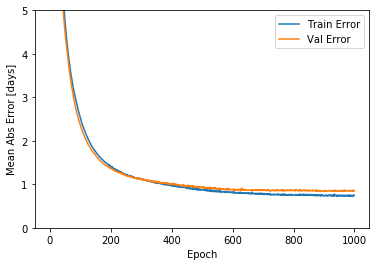

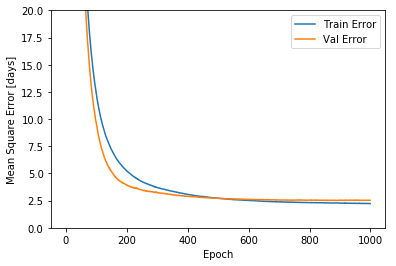

In [58]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_history(history,hist):
    #hist = pd.DataFrame(history.history)
    #hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [days]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [days]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history,hist)

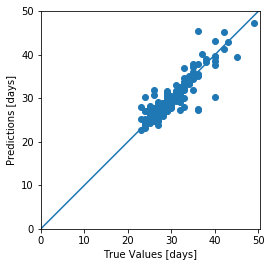

In [59]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [days]')
plt.ylabel('Predictions [days]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])



In [60]:
print(X_test[20],test_predictions[20])

[-0.13033954 -0.81607603  1.14845982 -0.18788872  0.91305476 -0.88062664
 -1.38625813  0.76696499  0.10960157 -0.69975901 -0.36879463 -0.19542707
 -0.30941548  0.06819109 -0.31264858  0.78872641  0.95083969] 28.871508


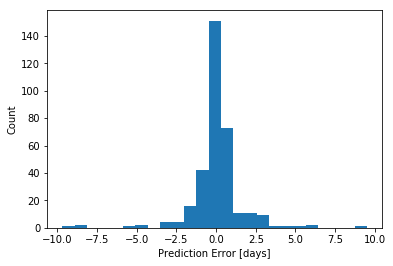

In [61]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [days]")
_ = plt.ylabel("Count")